# Exploratory Data Analysis

Let's create an InfluxDB client by importing the modules and setting all the required configuration. 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

# configure influxdb client
BUCKET = "racing"
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)

query_api = client.query_api()

Now we query a specific session and get the data back as a Pandas DataFrame.

Check it out at the [Pitwall](https://pitwall.b4mad.racing/d/6d57246de74745198b3385f5e446e81cf7127b47/session?orgId=1&var-SessionId=1667228407&time=1667229411221&time.window=3600000&from=1667228301041&to=1667229529783)

Since it's a single session, but Influx requires a range, we query 10 years in the past.

In [3]:
SESSION = "1668412932"

query = f"""
from(bucket: "{BUCKET}")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{SESSION}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_start,_stop,_time,CarModel,GameName,SessionId,SessionTypeName,TrackCode,...,Clutch,CurrentLap,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle
0,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:02:12.403000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,1.0,0.000000,6149.62842,3.0,0.0,0.0,49.251740,-0.008059,1.000000
1,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:02:12.434000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,1.0,0.000000,6151.26758,3.0,0.0,0.0,49.331750,-0.001438,1.000000
2,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:02:12.465000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,1.0,0.000000,6152.90967,3.0,0.0,0.0,49.415283,0.000577,1.000000
3,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:02:12.496000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,1.0,0.000000,6154.55500,3.0,0.0,0.0,49.509033,-0.000574,1.000000
4,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:02:12.526000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,1.0,0.000000,6155.37900,3.0,0.0,0.0,49.552242,-0.000863,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33053,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:19:12.465000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,8.0,121.723770,6073.29248,4.0,0.0,0.0,55.268460,-0.008634,0.997318
33054,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:19:12.496000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,8.0,121.757100,6075.12158,4.0,0.0,0.0,55.308186,-0.003453,0.996131
33055,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:19:12.527000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,8.0,121.790436,6076.95200,4.0,0.0,0.0,55.348190,0.004031,0.996131
33056,_result,0,2012-11-18 01:35:00.734654+00:00,2022-11-18 13:35:00.734654+00:00,2022-11-14 08:19:12.558000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1668412932,Race,roadamerica full,...,1.0,8.0,121.823769,6078.78400,4.0,0.0,0.0,55.389435,0.009499,0.996131


Now we can plot the data, starting with just the brake inputs and the time on the x axis.

<AxesSubplot:xlabel='datetime'>

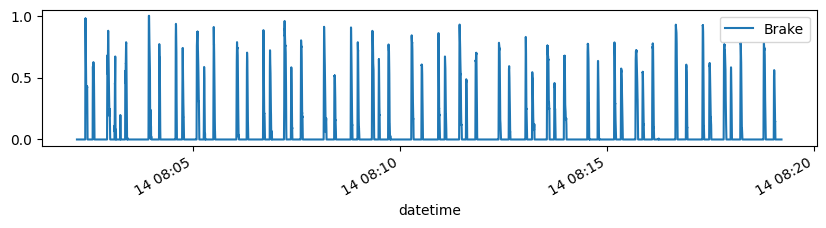

In [4]:
brake = df.copy()
brake = brake[["Brake", "_time"]]
brake["datetime"] = pd.to_datetime(brake["_time"])
brake.drop(columns=["_time"], inplace=True)
brake.set_index("datetime", inplace=True)
brake.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (10, 2)
brake.plot()

Now plot every other value column, the x-axis is the just the index of the DataFrame.

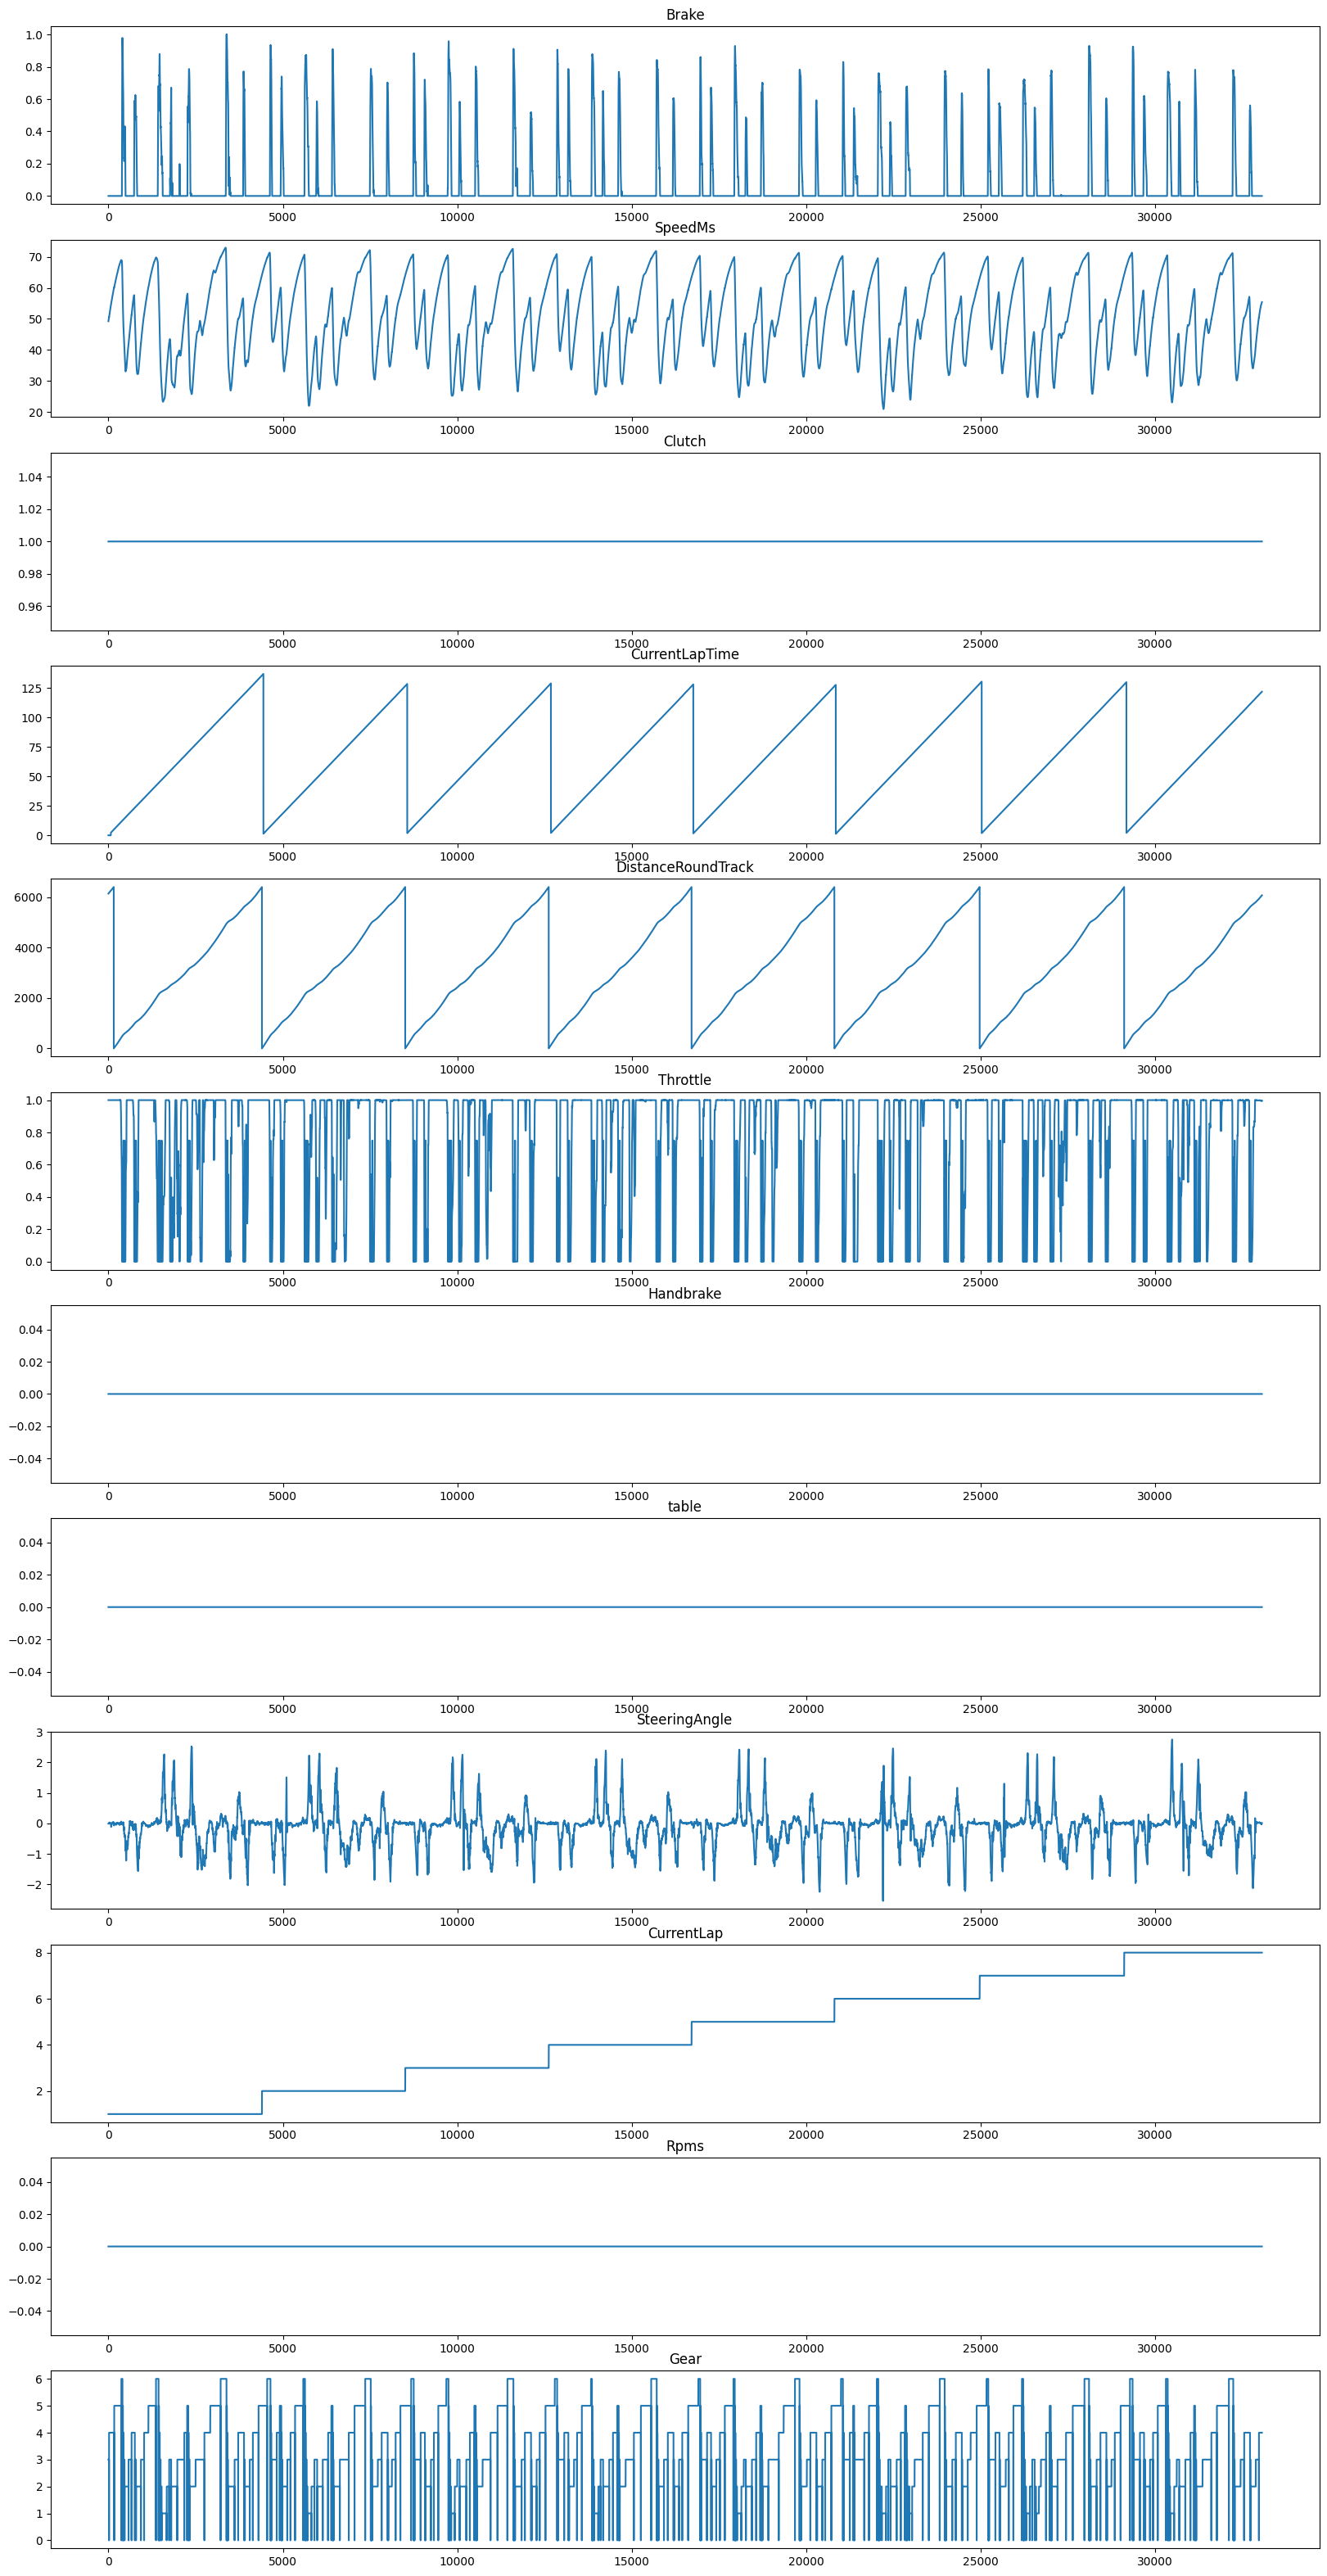

In [5]:
plt.rcParams["figure.figsize"] = (20, 40)
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
cols = set(newdf.columns)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    newdf[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

And just a single lap.

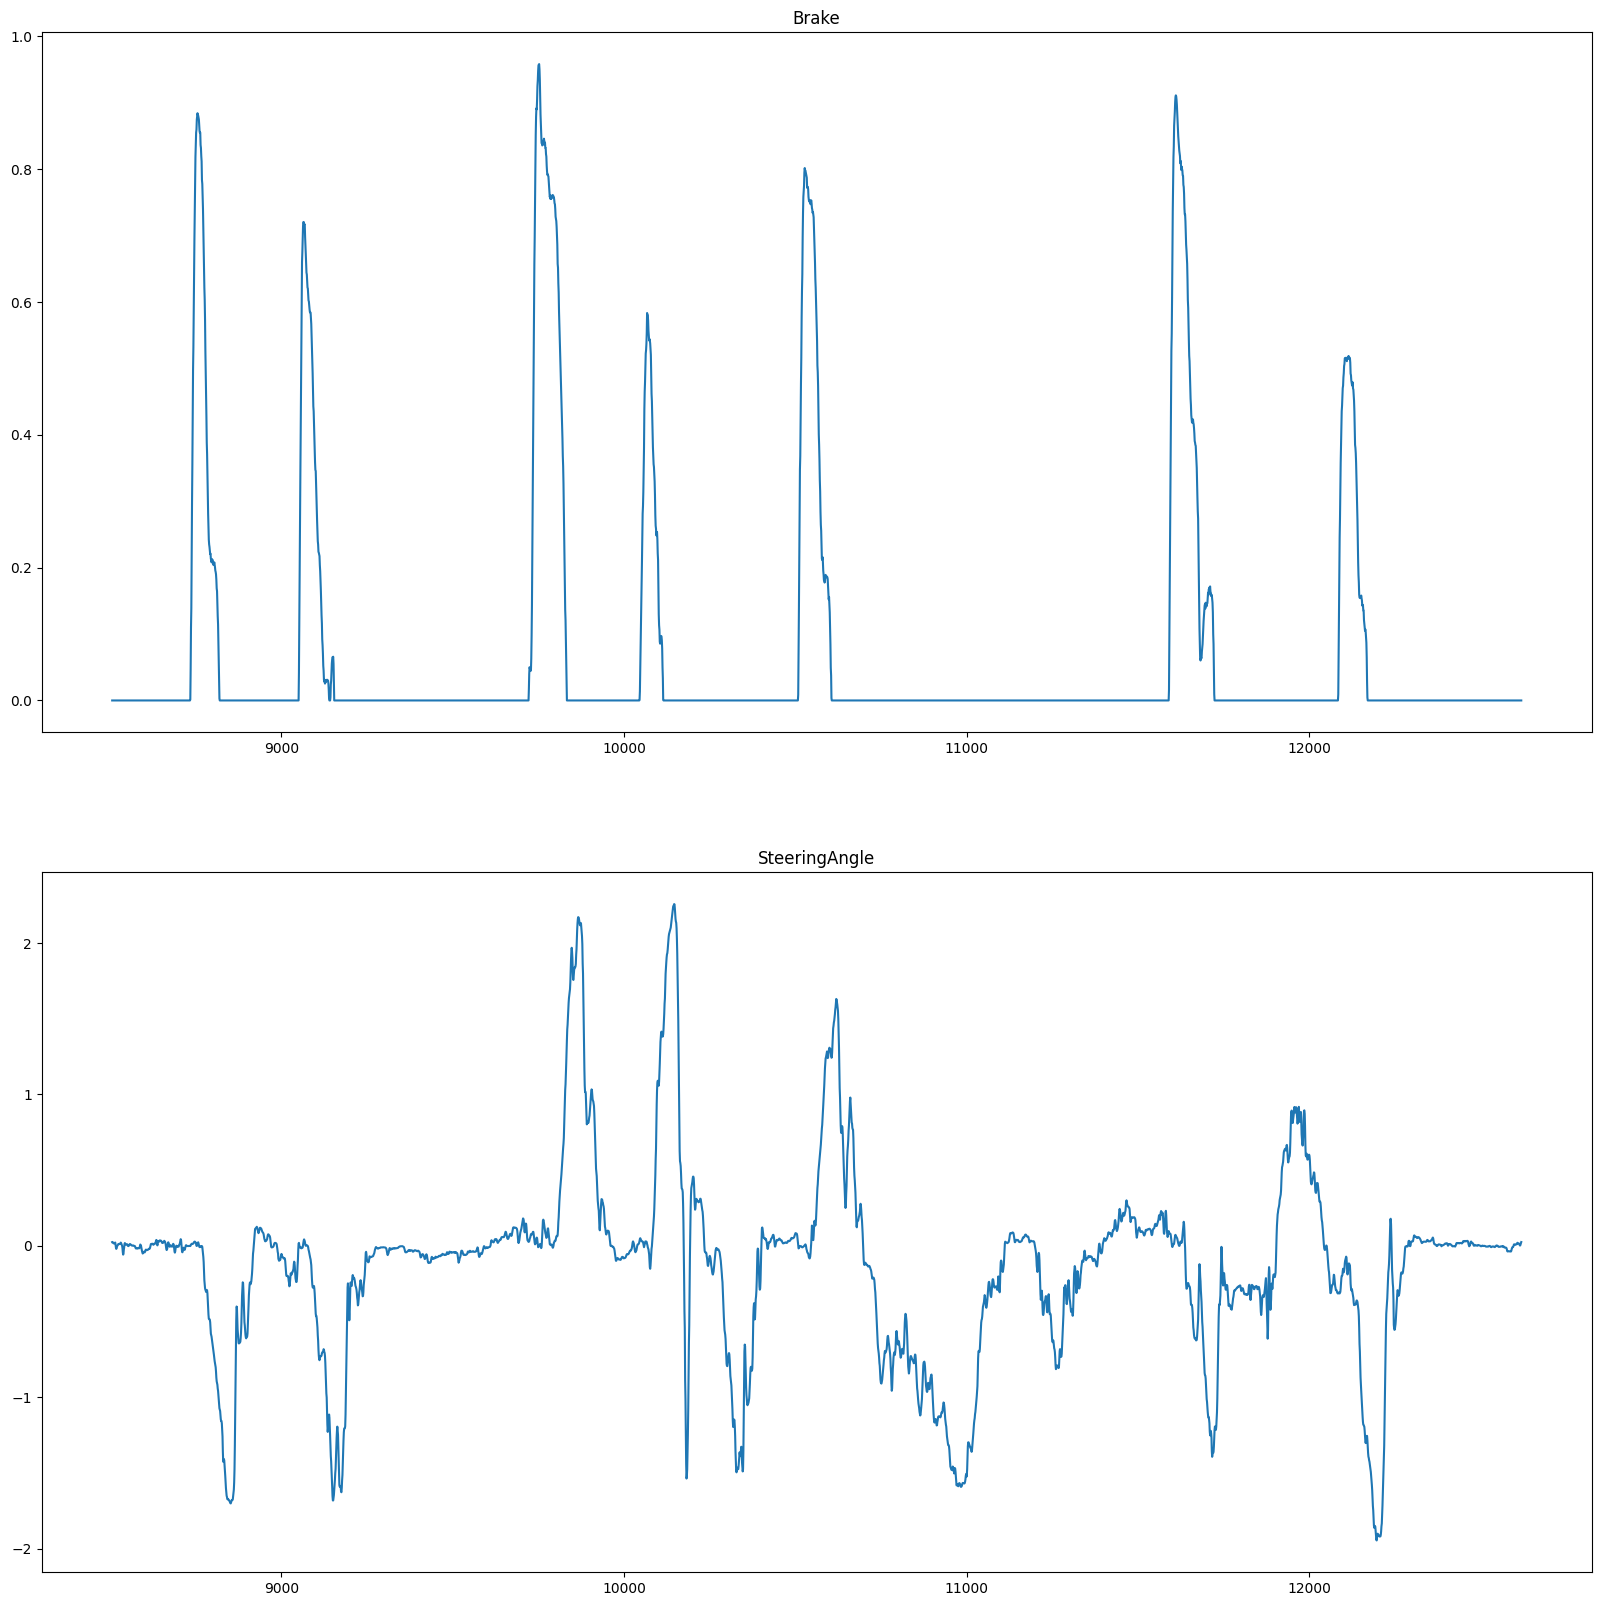

In [6]:
lap = 3
plt.rcParams["figure.figsize"] = (20, 20)
cols = ["Brake", "SteeringAngle"]
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df.loc[df["CurrentLap"] == lap, c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

Now we plot all brake values for all laps against the distance.

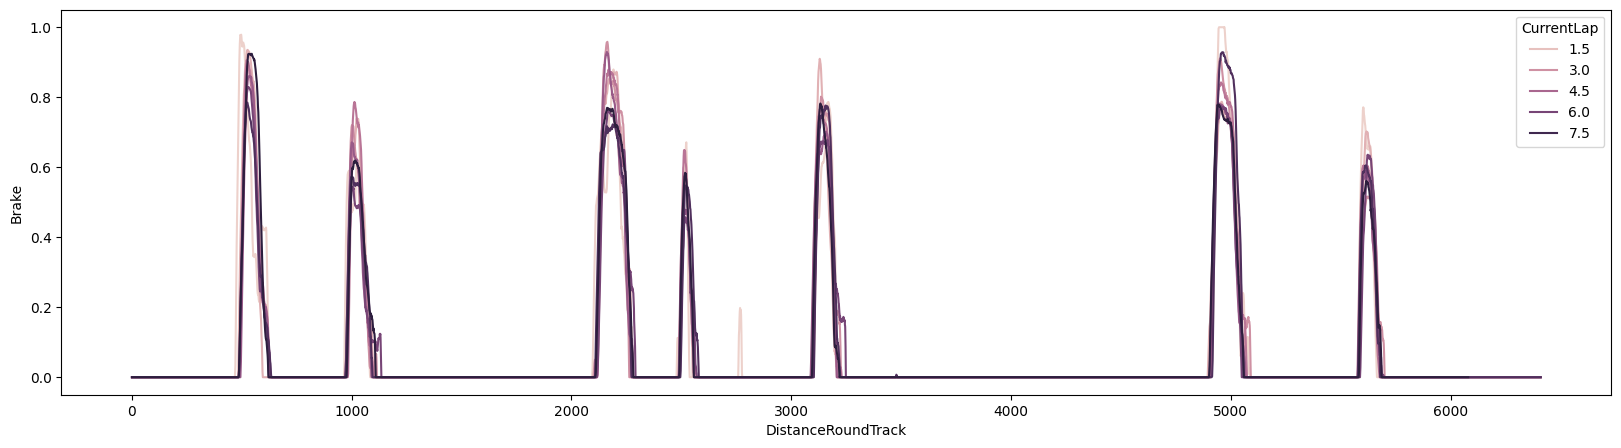

In [7]:
plt.rcParams["figure.figsize"] = (20, 5)
for c in ["Brake"]:
    sns.lineplot(data=df, x="DistanceRoundTrack", y=c, hue="CurrentLap", legend=True)
    plt.show()